<a href="https://colab.research.google.com/github/AbdielWillyar/app-streamlit/blob/main/malaria_cell_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abdiel","key":"0f1fb554c2c593cd2f695794ddaa6a8f"}'}

Extract Image

In [7]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [8]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import os
os.chdir('drive/MyDrive/Kaggle/')

In [11]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria

100% 675M/675M [00:06<00:00, 118MB/s]



In [12]:
os.listdir()

['kaggle.json', 'cell-images-for-detecting-malaria.zip']

In [13]:
import os
# Complete path to storage location of the .zip file of data
zip_path = '/content/drive/MyDrive/Kaggle/cell-images-for-detecting-malaria.zip'
# Check current directory (be sure you're in the directory where Colab operates: '/content')
os.getcwd()
# Copy the .zip file into the present directory
!cp '{zip_path}' .
# Unzip quietly 
!unzip -q 'cell-images-for-detecting-malaria.zip'
# View the unzipped contents in the virtual machine
os.listdir()

cp: '/content/drive/MyDrive/Kaggle/cell-images-for-detecting-malaria.zip' and './cell-images-for-detecting-malaria.zip' are the same file


['kaggle.json', 'cell-images-for-detecting-malaria.zip', 'cell_images']

In [16]:
os.listdir('cell_images')

['Parasitized', 'Uninfected', 'cell_images']

In [17]:
os.listdir('cell_images/cell_images')

['Parasitized', 'Uninfected']

In [18]:
path_dir = 'cell_images/cell_images'

Preprocessing

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#image data generataor
datagen = ImageDataGenerator(
                    rescale=1./255,
                    validation_split = 0.2)

In [20]:
train_generator = datagen.flow_from_directory(
    path_dir,
    target_size=(150,150),
    shuffle=True,
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    path_dir,
    target_size=(150,150),
    subset='validation'
)

Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.


CNN Model



In [21]:
import tensorflow as tf

#Activation function: relu and sigmoid

model = tf.keras.models.Sequential([
    #first_convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    #second_convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #third_convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #fourth_convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid') 
])

Compile model, with adam optimizer, binary crossentropy 


In [22]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

Fit Model

In [23]:
model.fit(
      train_generator,
      steps_per_epoch=25, 
      epochs=20,
      validation_data=validation_generator, 
      validation_steps=5,
      verbose=2)

Epoch 1/20
25/25 - 49s - loss: 0.6959 - accuracy: 0.5175 - val_loss: 0.7033 - val_accuracy: 0.4313
Epoch 2/20
25/25 - 39s - loss: 0.6328 - accuracy: 0.6562 - val_loss: 0.7640 - val_accuracy: 0.7750
Epoch 3/20
25/25 - 39s - loss: 0.5175 - accuracy: 0.7875 - val_loss: 0.3806 - val_accuracy: 0.8750
Epoch 4/20
25/25 - 39s - loss: 0.3837 - accuracy: 0.8850 - val_loss: 0.3086 - val_accuracy: 0.9312
Epoch 5/20
25/25 - 39s - loss: 0.2298 - accuracy: 0.9225 - val_loss: 0.1345 - val_accuracy: 0.9500
Epoch 6/20
25/25 - 39s - loss: 0.2213 - accuracy: 0.9262 - val_loss: 0.2110 - val_accuracy: 0.9438
Epoch 7/20
25/25 - 39s - loss: 0.1808 - accuracy: 0.9350 - val_loss: 0.1000 - val_accuracy: 0.9563
Epoch 8/20
25/25 - 39s - loss: 0.1673 - accuracy: 0.9337 - val_loss: 0.3180 - val_accuracy: 0.9062
Epoch 9/20
25/25 - 38s - loss: 0.1937 - accuracy: 0.9375 - val_loss: 0.1052 - val_accuracy: 0.9750
Epoch 10/20
25/25 - 39s - loss: 0.1674 - accuracy: 0.9438 - val_loss: 0.1593 - val_accuracy: 0.9250
Epoch 11/

Save Model and Predict

Confusion matrix is ​​used to see the performance of the model

In [24]:
model.save("malaria_cell.h5") #the model is saved with the name malaria_cell.h5

confusion matrix
[[2798    0]
 [   0 2712]]


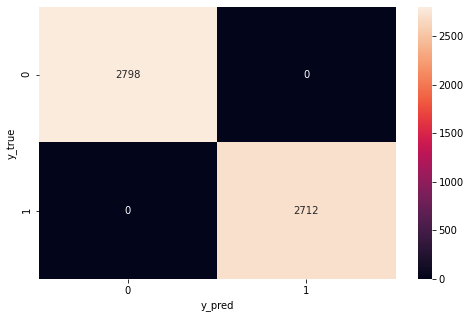

In [25]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

pred = model.predict(validation_generator)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(pred, axis=1)
    
print('confusion matrix')
print(confusion_matrix(y_true, y_pred))
    
    #confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

**Validation accuracy reaches 91.25% and based on the existing confusion matrix, the system does not experience prediction errors.**